In [51]:
import pandas as pd
import numpy as np
import os
import re

import matplotlib.pyplot as plt

from pathlib import Path
import seaborn as sns

In [52]:
path_root = os.path.abspath("")
path = Path(path_root)
assert path.is_dir()

# -------------------------------------------------------------------------
# Load the data
data_dir = path
assert data_dir.is_dir()

train_dir = data_dir / "train_input" / "resnet_features"
test_dir = data_dir / "test_input" / "resnet_features"

train_output_filename = data_dir / "train_output.csv"

train_output = pd.read_csv(train_output_filename)

# Get the filenames for train
filenames_train = [train_dir /
                   "{}.npy".format(idx) for idx in train_output["ID"]]
for filename in filenames_train:
    assert filename.is_file(), filename

# Get the labels
labels_train = train_output["Target"].values

assert len(filenames_train) == len(labels_train)

# Get the numpy filenames for test
filenames_test = sorted(test_dir.glob("*.npy"))
for filename in filenames_test:
    assert filename.is_file(), filename
ids_test = [f.stem for f in filenames_test]

## Analysis of input graphs data

112

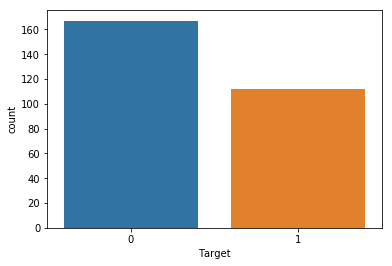

In [64]:
ax = sns.countplot(x="Target", data=train_output)
np.sum([value == 0 for value in train_output.Target.values])
np.sum([value == 1 for value in train_output.Target.values])

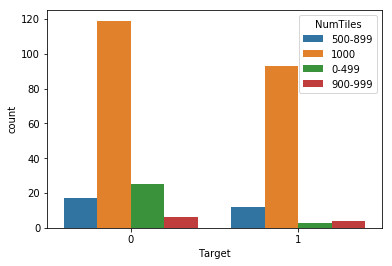

In [61]:
num_features_train = []
for f in filenames_train:
    patient_features = np.load(f)

    # Remove location features (but we could use them?)
    patient_features = patient_features[:, 3:]
    num_features_train.append(len(patient_features))
sorted_num_features_train = sorted(num_features_train)
cat_num_features_train = [groupByValues(value) for value in sorted_num_features_train]
# ax1 = sns.countplot(cat_num_features_train)
train_output["NumTiles"] = [groupByValues(value) for value in num_features_train]

ax = sns.countplot(x="Target", hue="NumTiles", data=train_output)

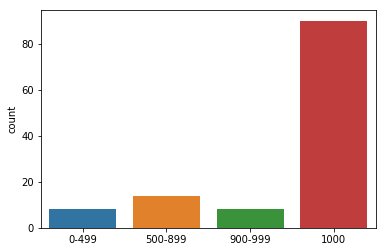

In [47]:
num_features_test = []
for f in filenames_test:
    patient_features = np.load(f)

    # Remove location features (but we could use them?)
    patient_features = patient_features[:, 3:]
    num_features_test.append(len(patient_features))
num_features_test.sort()
cat_num_features_test = [groupByValues(value) for value in num_features_test]
ax2 = sns.countplot(cat_num_features_test)

In [38]:
def groupByValues(value):
        if value ==  1000:
            return "1000"
        elif value > 899:
            return "900-999"
        elif value > 499:
            return "500-899"
        else:
            return "0-499"